In [213]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

from IPython.display import HTML, display, clear_output


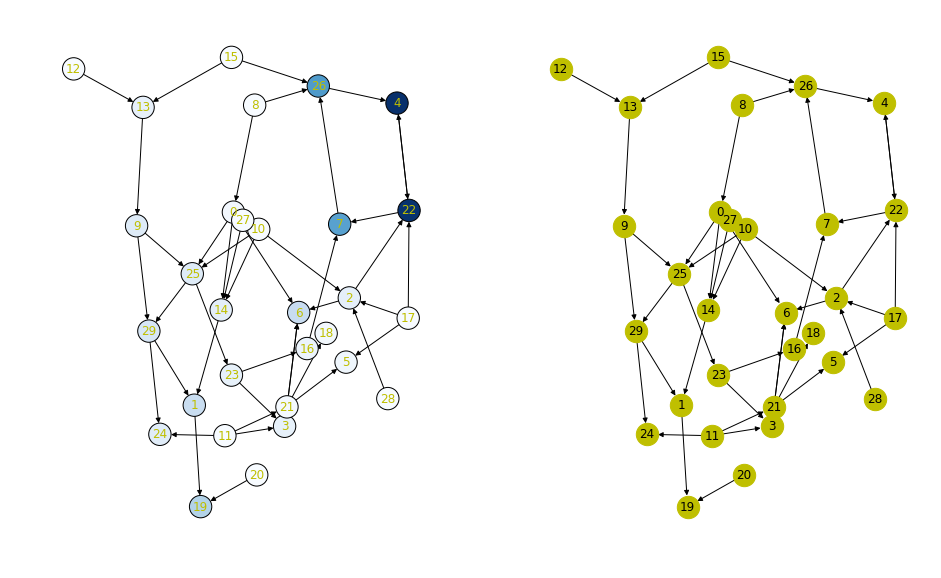

In [129]:
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)

for node in g.nodes:
    g.node[node]['pagerank'] = nx.pagerank(g)[node]
    

fig, axes = plt.subplots(1,2,figsize=(16,10))

nx.draw(g, ax=axes[0], pos=nx.kamada_kawai_layout(g),with_labels=True, node_size=500, node_color=[g.node[i]['pagerank'] for i in g.nodes],cmap=plt.cm.Blues, font_color='y')
nx.draw(g, ax=axes[1], pos=nx.kamada_kawai_layout(g),with_labels=True, node_size=500, node_color='y',cmap=plt.cm.Blues, font_color='black')
axes[0].collections[0].set_edgecolor('black')
plt.show()


In [130]:
for node in g.nodes:
    g.node[node]['active'] = 0
    
g.node[8]

In [326]:
active_node = 1
alpha = 0.85
timesteps = 4000
#draw_function = nx.draw(g, pos=nx.kamada_kawai_layout(g),with_labels=True, node_size=500, node_color=[g.node[i]['active'][-1] for i in g.nodes],cmap='Wistia')
for node in g.nodes:
    g.node[node]['active'] = []
    g.node[node]['pagerank'] = nx.pagerank(g)[node]



# fig_u, ax_u = plt.subplots()
# im_pos = []

for _ in range(timesteps):
    
    active_node = 1 if i==0 else active_node
    
    neighbors = list(g.neighbors(active_node))
    other_nodes = [n for n in g.nodes if n not in neighbors]

    for node in g.nodes:
        state = 1 if node == active_node else 0
        g.node[node]['active'].append(state)


    if np.random.random() < alpha and len(neighbors)!=0:
        active_node = np.random.choice(neighbors)
    else:
        active_node = np.random.choice(other_nodes)
        
        
        
    #positions = nx.get_node_attributes(g, 'pos')
#     nodes = nx.draw_networkx_nodes(g,nx.kamada_kawai_layout(g), ax=ax_u)
#     edges = nx.draw_networkx_edges(g,nx.kamada_kawai_layout(g), ax=ax_u)
#     im_pos.append([nodes, edges, ])

    
    #nx.draw(g, pos=nx.kamada_kawai_layout(g),with_labels=True, node_size=500, node_color=[g.node[i]['active'][-1] for i in g.nodes],cmap='Wistia')
    #plt.show()

In [327]:
for node in g.nodes:
    g.node[node]['running_pagerank'] = [np.mean(g.node[node]['active'][:n]) for n in range(1,timesteps+1)]


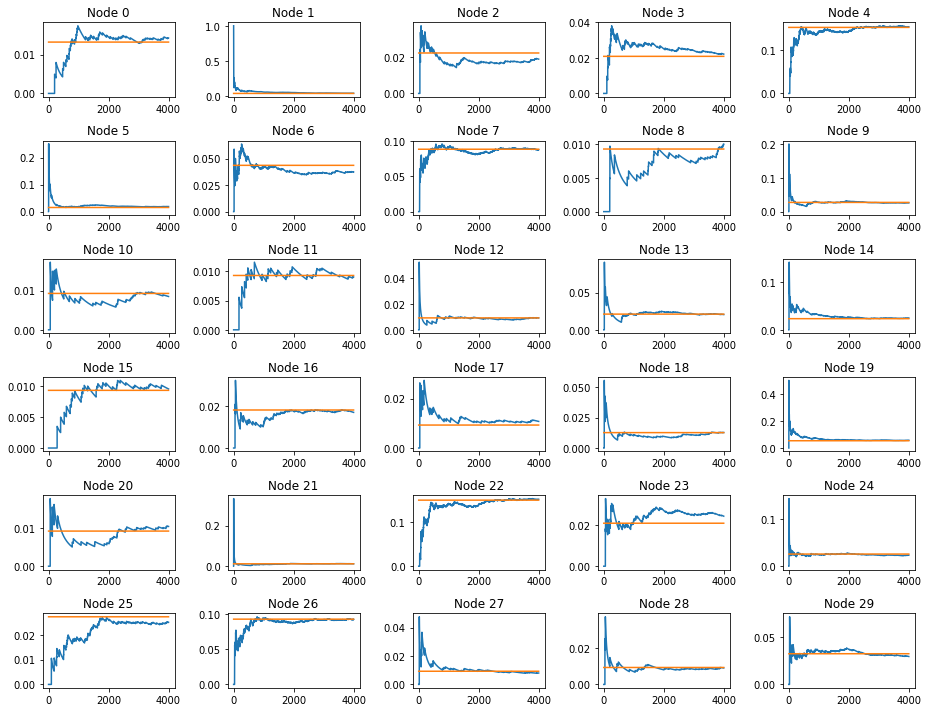

In [328]:
fig, axes = plt.subplots(6,5,figsize=(13,10))

for node in g.nodes:
    axes[node//5,node%5].set_title('Node {}'.format(node))
    axes[node//5,node%5].plot(range(1,timesteps+1),g.node[node]['running_pagerank'])
    axes[node//5,node%5].plot(range(1,timesteps+1),np.ones(timesteps)*g.node[node]['pagerank'])
    #axes[node//5,node%5].set_ylim(0,1)
    
plt.tight_layout()
plt.show()
    

In [272]:

# ani_pos = anim.ArtistAnimation(fig_u, im_pos[0], interval=50)

# Writer = anim.writers['ffmpeg']
# writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)
# ani_pos.save('pagerank.mp4', writer='writer')#, bitrate=300)

#ani_pos.save('pagerank.mp4',writer=writer)

# for node in g.nodes:
#     print(g.node[node]['active'])

/Users/nico/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py:1218: UserWarning: MovieWriter writer unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


TypeError: 'PathCollection' object is not iterable

In [238]:
fig = plt.gcf()
ani = anim.FuncAnimation(fig, update, interval=50, frames=range(20), blit=True)
ani.save('crap.gif', writer='imagemagick',  savefig_kwargs={'facecolor':'white'}, fps=1)

#anim.save(filename, writer='imagemagick')

Traceback (most recent call last):
  File "/Users/nico/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/Users/nico/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/Users/nico/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1081, in _start
    self._init_draw()
  File "/Users/nico/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1792, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/Users/nico/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1820, in _draw_frame
    a.set_animated(self._blit)
AttributeError: 'int' object has no attribute 'set_animated'
/Users/nico/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py:1218: UserWarning: MovieWriter imagemagick unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


AttributeError: 'int' object has no attribute 'set_animated'

In [242]:
nx.get_node_attributes(g, 'pos')

{}

In [308]:
29//2

14